<a href="https://colab.research.google.com/github/osirisizs/ML/blob/main/ML_WILDFIRES_VV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerias necesarias
---

In [80]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import tensorflow as tf
from google.colab import drive
import numpy as np
import pandas as pd
from rasterio.plot import show
import matplotlib.pyplot as plt
import rasterio
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Conectamos con Drive
---

In [83]:
# Montar Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
# Definir la carpeta con las imágenes
folder_path_nbr_values = '/content/drive/MyDrive/FINAL'

In [85]:
# Obtener la lista de archivos de imágenes
file_list = os.listdir(folder_path_nbr_values)
image_files = [file for file in file_list if file.endswith(('.tif'))] #Se crea una lista con los nombres de los archivos
print(f"La carpeta contiene " + str(len(image_files)) + " imágenes") #Imprimir el numero de imagenes leidas

La carpeta contiene 112 imágenes


# Normalizacion de 0-1 los canales de las imagenes
---

In [86]:
imagenesNormalizadas= '/content/drive/MyDrive/FINAL/Normalized'

In [87]:
# Normalizar cada imagen por separado
for image_file in image_files:
    # Ruta completa de la imagen
    image_path = os.path.join(folder_path_nbr_values, image_file)
    
    # Leer la imagen TIFF
    with rasterio.open(image_path) as src:
        image = src.read()  # Obtener todos los canales de la imagen
        
        # Normalizar los valores de los píxeles en todos los canales
        normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))


        # Guardar la imagen normalizada en un nuevo archivo TIF
        output_path = os.path.join(imagenesNormalizadas, 'normalized_' + image_file)
        with rasterio.open(output_path, 'w', **src.profile) as dst:
            dst.write(normalized_image)  # Escribir los canales normalizados en el nuevo archivo TIF

In [88]:
carpeta = '/content/drive/MyDrive/FINAL/Normalized'

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta)

for archivo in archivos:
    # Construir la ruta completa del archivo
    ruta_archivo = os.path.join(carpeta, archivo)

    # Abrir el archivo TIFF con rasterio
    with rasterio.open(ruta_archivo) as imagen:
        image_array = imagen.read()
        print(str(image_array.shape))

(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 39)
(2, 48, 39)
(2, 48, 39)
(2, 48, 39)
(2, 48, 39)
(2, 48, 39)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 39)
(2, 48, 39)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 39)
(2, 48, 39)
(2, 48, 39)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 39)
(2, 48, 39)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 48, 40)
(2, 48, 39)
(2, 48, 40)
(2, 48, 39)
(2, 48, 39)
(2, 48, 40)
(2, 48, 39)
(2, 48, 39)
(2, 48, 39)
(2, 48, 40)
(2, 48, 39)
(2, 48, 39)
(2, 48, 40)
(2, 48, 40)
(2, 

# Reshaping NBR
---



In [89]:
carpeta_salida = '/content/drive/MyDrive/FINAL/NBR'

In [90]:
for image in image_files:
  #Le damos el path completo de cada imagen
    file_path = os.path.join(folder_path_nbr_values, image) 
    
    with rasterio.open(file_path) as src: #Abrimos con Rasterio
        image_array = src.read() #Leemos el array de la imagen
        
    resized_image = cv2.resize(image_array[0], (40, 48)) #Resize
        
    output_path = os.path.join(carpeta_salida, image) #guardamos
    
    resized_image = np.nan_to_num(resized_image)

    # Save the resized image
    cv2.imwrite(output_path, resized_image)

In [91]:
carpeta = carpeta_salida

In [92]:
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta)

for archivo in archivos:
    # Construir la ruta completa del archivo
    ruta_archivo = os.path.join(carpeta, archivo)

    # Abrir el archivo TIFF con rasterio
    with rasterio.open(ruta_archivo) as imagen:
        image_array = imagen.read()
        print(str(image_array.shape))

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 

In [93]:
# Obtener la lista de archivos de imágenes
file_list = os.listdir(carpeta_salida)
image_files = [file for file in file_list if file.endswith(('.tif'))] #Se crea una lista con los nombres de los archivos
print(f"La carpeta contiene " + str(len(image_files)) + " imágenes") #Imprimir el numero de imagenes leidas

La carpeta contiene 112 imágenes


#Leyendo las imagenes para ver si funciona
---

In [94]:
def desplegando_imagen_NBR(ruta_imagen): 
  with rasterio.open(ruta_imagen) as image:
    image_array = image.read()
  image_array.shape
  a = image_array[0]
  #print(image_array) #Para corroborar que "normalizar" funciono
  plt.imshow(a)

In [95]:
def desplegando_imagen_NVDI(ruta_imagen): 
  with rasterio.open(ruta_imagen) as image:
    image_array = image.read()
  image_array.shape
  a = image_array[1]
  #print(image_array)
  plt.imshow(a)

# Reshaping NDVI
---

In [96]:
carpeta_salida = '/content/drive/MyDrive/FINAL/NDVI'

In [97]:
for image in image_files:
  #Le damos el path completo de cada imagen
    file_path = os.path.join(folder_path_nbr_values, image) 
    
    with rasterio.open(file_path) as src: #Abrimos con Rasterio
        image_array = src.read() #Leemos el array de la imagen
        
        resized_image = cv2.resize(image_array[1], (40, 48)) #Resize
        
        output_path = os.path.join(carpeta_salida, image) #guardamos

        resized_image = np.nan_to_num(resized_image)
        
        # Save the resized image
        cv2.imwrite(output_path, resized_image)

In [98]:
carpeta = carpeta_salida

In [99]:
# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta)

for archivo in archivos:
    # Construir la ruta completa del archivo
    ruta_archivo = os.path.join(carpeta, archivo)

    # Abrir el archivo TIFF con rasterio
    with rasterio.open(ruta_archivo) as imagen:
        image_array = imagen.read()
        print(str(image_array.shape))

(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 48, 40)
(1, 

In [100]:
# Obtener la lista de archivos de imágenes
file_list = os.listdir(carpeta_salida)
image_files = [file for file in file_list if file.endswith(('.tif'))] #Se crea una lista con los nombres de los archivos
print(f"La carpeta contiene " + str(len(image_files)) + " imágenes") #Imprimir el numero de imagenes leidas

La carpeta contiene 112 imágenes


# Vizualizando Imagenes
---

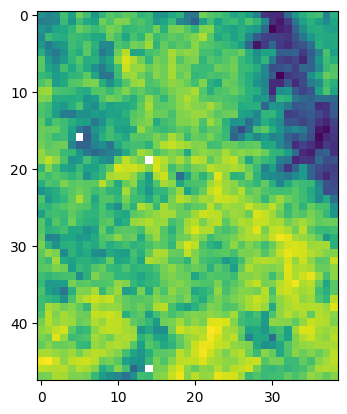

In [101]:
desplegando_imagen_NBR('/content/drive/MyDrive/FINAL/LC08_030046_20180106.tif')
#desplegando_imagen_NVDI('/content/drive/MyDrive/FINAL/LC08_030046_20180106.tif')

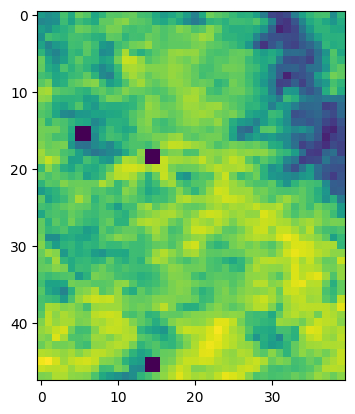

In [102]:
desplegando_imagen_NBR('/content/drive/MyDrive/FINAL/NBR/LC08_030046_20180106.tif')

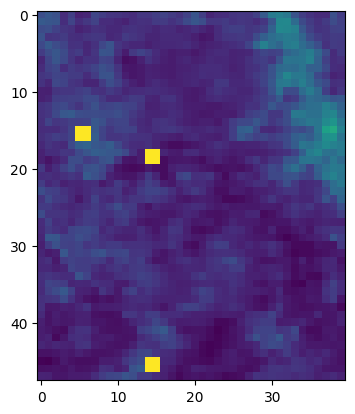

In [103]:
desplegando_imagen_NBR('/content/drive/MyDrive/FINAL/NDVI/LC08_030046_20180106.tif')

# Importando las imagenes
---

In [104]:
NBR_dic = '/content/drive/MyDrive/FINAL/NBR'
NDVI_dic = '/content/drive/MyDrive/FINAL/NDVI'

In [105]:
NBR_img = []
NDVI_img = []

for image in image_files:
    file_path = os.path.join(NBR_dic, image) #Le damos el path completo de cada NBR imagen
    
    with rasterio.open(file_path) as src: #Abrimos con Rasterio
        image_array = src.read() #Leemos el array de la imagen
        
    NBR_img.append(image_array)

for image in image_files:
    file_path = os.path.join(NDVI_dic, image) #Le damos el path completo de cada NDVI imagen

    with rasterio.open(file_path) as src: #Abrimos con Rasterio
        image_array = src.read() #Leemos el array de la imagen

    NDVI_img.append(image_array)


In [106]:
# NBR_img[0].shape
len(NBR_img)

112

In [107]:
# NDVI_img[0].shape
len(NDVI_img)

112

In [108]:
# NO FUNCIONA!!!!!!!!
# Unir ambos canales en una sola imagen
train_img = []

for i in range(112):
    train_img.append([NBR_img[i], NDVI_img[i]])

In [109]:
# len(train_img)
train_img[0]

[array([[[0.39408496, 0.35821307, 0.38385284, ..., 0.5129628 ,
          0.3566786 , 0.47730437],
         [0.33693808, 0.35167566, 0.36370203, ..., 0.43054023,
          0.38141146, 0.44866607],
         [0.40233648, 0.37359935, 0.44097924, ..., 0.47033966,
          0.4398266 , 0.43348372],
         ...,
         [0.7095438 , 0.7251191 , 0.6781771 , ..., 0.6062865 ,
          0.6331903 , 0.6585795 ],
         [0.66202265, 0.6512448 , 0.64737254, ..., 0.6388479 ,
          0.6467309 , 0.64044034],
         [0.58324724, 0.58753127, 0.6349598 , ..., 0.59272426,
          0.5636369 , 0.5975564 ]]], dtype=float32),
 array([[[-0.67216134, -0.6435475 , -0.6635898 , ..., -0.77372974,
          -0.6688268 , -0.72524965],
         [-0.63281536, -0.64792   , -0.6530793 , ..., -0.731956  ,
          -0.67842805, -0.7148065 ],
         [-0.6797779 , -0.6691992 , -0.7137127 , ..., -0.74834776,
          -0.7165742 , -0.7120842 ],
         ...,
         [-0.8730667 , -0.8830586 , -0.8533631 , ..., 

In [110]:
input_shapes = set(np.array(image).shape for image in train_img)

print("Formas de las imágenes NBR de entrada:")
print(input_shapes)

Formas de las imágenes NBR de entrada:
{(2, 1, 48, 40)}


In [111]:
from rasterio.enums import Resampling

In [112]:
for image in image_files:
    #Le damos el path completo de cada NBR imagen
    file_path_NBR = os.path.join(NBR_dic, image) 
    #Le damos el path completo de cada NDVI imagen
    file_path_NDVI = os.path.join(NDVI_dic, image) 

    NBR = rasterio.open(file_path_NBR)
    NDVI = rasterio.open(file_path_NDVI)

    profile = NBR.profile
    profile.update(count=2)

    with rasterio.open('/content/drive/MyDrive/FINAL/Multiband/' + image, 
                       'w', **profile) as dst:
        # Write the first image to the new TIF file
        dst.write(NBR.read(), indexes=[1])

        # Write the second image to the new TIF file
        dst.write(NDVI.read(), indexes=[2])


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:314: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [113]:
with rasterio.open('/content/drive/MyDrive/FINAL/Multiband/LC08_030046_20180311.tif') as src: #Abrimos con Rasterio
        image_array = src.read() #Leemos el array de la imagen

image_array.shape

(2, 48, 40)

In [114]:
multiband_dic = '/content/drive/MyDrive/FINAL/Multiband'

In [115]:
pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
train_img = []

for image in image_files:
    #Le damos el path completo de cada TIF imagen
    file_path = os.path.join(multiband_dic, image) 
    
    with rasterio.open(file_path) as src: #Abrimos con Rasterio
        image_array = src.read() #Leemos el array de la imagen
        
    train_img.append(image_array)

train_img_2 = np.stack([img for img in train_img], axis=0)
print(train_img_2.shape)

(112, 2, 48, 40)


In [117]:
# Assuming you have a 2-channel TIF image with shape (2, 48, 40)
image = train_img_2

# Reshape the image to (48, 40, 2)
reshaped_image = np.transpose(image, (0, 2, 3, 1))

print(reshaped_image.shape)

(112, 48, 40, 2)


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(reshaped_image, test_size=0.2, random_state=42)

In [119]:
X_train.shape

(89, 48, 40, 2)

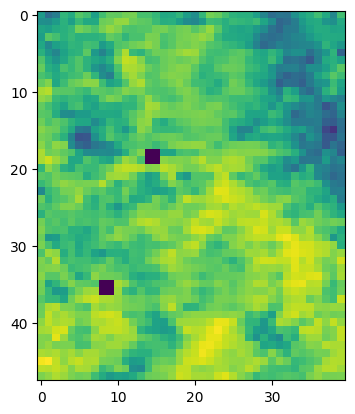

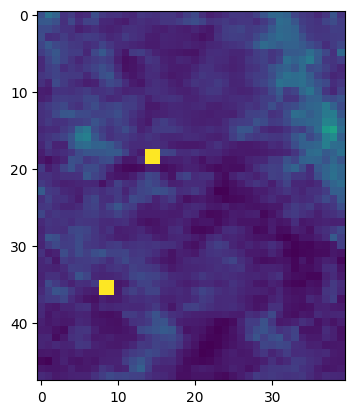

<Axes: >

In [120]:
show(X_train[0, :, :, 0])
show(X_train[0, :, :, 1])

# Implementación del Modelo
---

In [121]:
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Define la arquitectura del autoencoder
input_layer = Input(shape=(48, 40, 2))
encoder = Conv2D(16, (3, 3), activation="relu", padding="same")(input_layer)
encoder = MaxPooling2D((2, 2))(encoder)
decoder = Conv2D(16, (3, 3), activation="relu", padding="same")(encoder)
decoder = UpSampling2D((2, 2))(decoder)
output_layer = Conv2D(2, (3, 3), activation="sigmoid", padding="same")(decoder)

# Crea el modelo del autoencoder
autoencoder = Model(input_layer, output_layer)

# Compila el modelo
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 40, 2)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 40, 16)        304       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 20, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 20, 16)        2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 48, 40, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 40, 2)         290   

In [122]:
# Entrena el autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/50
3/3 [==============================] - 1s 140ms/step - loss: 0.6696 - val_loss: 0.6203
Epoch 2/50
3/3 [==============================] - 0s 72ms/step - loss: 0.6001 - val_loss: 0.5520
Epoch 3/50
3/3 [==============================] - 0s 69ms/step - loss: 0.5285 - val_loss: 0.4707
Epoch 4/50
3/3 [==============================] - 0s 74ms/step - loss: 0.4441 - val_loss: 0.3736
Epoch 5/50
3/3 [==============================] - 0s 74ms/step - loss: 0.3412 - val_loss: 0.2578
Epoch 6/50
3/3 [==============================] - 0s 72ms/step - loss: 0.2233 - val_loss: 0.1183
Epoch 7/50
3/3 [==============================] - 0s 69ms/step - loss: 0.0777 - val_loss: -0.0458
Epoch 8/50
3/3 [==============================] - 0s 76ms/step - loss: -0.0919 - val_loss: -0.2408
Epoch 9/50
3/3 [==============================] - 0s 68ms/step - loss: -0.3033 - val_loss: -0.4799
Epoch 10/50
3/3 [==============================] - 0s 72ms/step - loss: -0.5526 - val_loss: -0.7775
Epoch 11/50
3/3 [====

3/3 [==============================] - 0s 16ms/step


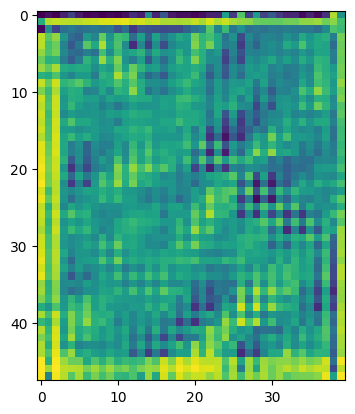

In [146]:
salida = autoencoder.predict(X_train)
plt.imshow(salida[10, :, :, 0])